In [2]:

import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '/usr/local/lib/python3.9/site-packages')

import pandas as pd


In [3]:
import pandas as pd
import scipy.stats as stats

import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

import matplotlib.pyplot as plt

%matplotlib inline 


In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [5]:
sns.set(rc={'figure.figsize':(8,4)}, style = "whitegrid")


In [6]:
# !pip3 install pandasql

In [7]:
# !pip3.9 install -U pandasql

In [8]:
# import pandasql
import pandasql as ps
from pandasql import sqldf
# pysqldf = lambda q: sqldf(q, globals())

                                                                        ВЗГЛЯД НА ФРЕЙМ
                                                                        
                                                                        

In [9]:
df_ecommerce = pd.read_csv('/Users/bruce/Documents/folder_for_analitics/e-commerce-sales-forecast.csv', encoding="ISO-8859-1")
df_ecommerce.shape

(541909, 8)

In [10]:
# df_ecommerce.tail()

q = "SELECT* FROM df_ecommerce;"
ps.sqldf(q, locals()).head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df_ecommerce.drop('Description', axis = 1, inplace=True)
#колонко Desc  не собираюсь пользоваться

                                       смотрю пропущенные значения

.

In [12]:
df_ecommerce.isna().sum()

# виду большое колличество в CustomerID
# узнаю долю - около 25%!
df_ecommerce.CustomerID.isna().sum()/df_ecommerce.shape[0]


InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

0.249266943342886


                       смотрю  характеристики количественных значений присущим Nan CustomerID 

In [13]:
# python version

# df_ecommerce[['UnitPrice', 'InvoiceDate', 'Quantity', 'CustomerID']].query('CustomerID.isna() == True').tail()
# df_ecommerce[['UnitPrice', 'InvoiceDate', 'Quantity', 'CustomerID']].query('CustomerID.isna() == False').tail()




q = """SELECT 
    Quantity, InvoiceDate, UnitPrice,CustomerID
    FROM df_ecommerce
    WHERE CustomerID is NULL
    ;"""
ps.sqldf(q, locals()).tail(5)

q = """SELECT 
    Quantity, InvoiceDate, UnitPrice,CustomerID
    FROM df_ecommerce
    WHERE CustomerID is NOT NULL
    ;"""
ps.sqldf(q, locals()).tail(5)

,Quantity,InvoiceDate,UnitPrice,CustomerID
135075,5,12/9/2011 10:26,4.13,None
135076,4,12/9/2011 10:26,4.13,None
135077,1,12/9/2011 10:26,4.96,None
135078,1,12/9/2011 10:26,10.79,None
135079,1,12/9/2011 10:26,1714.17,None


,Quantity,InvoiceDate,UnitPrice,CustomerID
406824,12,12/9/2011 12:50,0.85,12680.0
406825,6,12/9/2011 12:50,2.10,12680.0
406826,4,12/9/2011 12:50,4.15,12680.0
406827,4,12/9/2011 12:50,4.15,12680.0
406828,3,12/9/2011 12:50,4.95,12680.0


In [14]:
# смотрю харакетристики большинства (не Nan) CustomerID
df_ecommerce[['UnitPrice', 'InvoiceDate', 'Quantity', 'CustomerID']].query('CustomerID.isna() == False').describe()

,UnitPrice,Quantity,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,3.460471,12.061303,15287.690570
std,69.315162,248.693370,1713.600303
min,0.000000,-80995.000000,12346.000000
25%,1.250000,2.000000,13953.000000
50%,1.950000,5.000000,15152.000000
75%,3.750000,12.000000,16791.000000
max,38970.000000,80995.000000,18287.000000


In [15]:
#смотрю харакетристики меньшинства (Nan) CustomerID
df_ecommerce[['UnitPrice', 'InvoiceDate', 'Quantity', 'CustomerID']].query('CustomerID.isna() == True').describe()


,UnitPrice,Quantity,CustomerID
count,135080.000000,135080.000000,0.0
mean,8.076577,1.995573,NaN
std,151.900816,66.696153,NaN
min,-11062.060000,-9600.000000,NaN
25%,1.630000,1.000000,NaN
50%,3.290000,1.000000,NaN
75%,5.450000,3.000000,NaN
max,17836.460000,5568.000000,NaN


In [16]:
# ИТОГО

# В обеих подгруппах(где есть /остуствуют регистрация CustomerID) у колличественных признаков,не нормальные 
# рапсределения и есть выделяющиеся отрицаельны значения в колличестве заказаов и стоимости.
# Нужноб удет узнать с чем связано.

                               Смотрю InvoiceNo StockCode CustomerID

.

In [17]:
# значения этих колонок имеют свойство повторяться, посмотрб уникальные значения

# python version

for x in df_ecommerce[['InvoiceNo', 'StockCode', 'CustomerID']]:
    print(f' {x} has {df_ecommerce[x].nunique()} unique values')



 InvoiceNo has 25900 unique values
 StockCode has 4070 unique values
 CustomerID has 4372 unique values


In [18]:
# ИТОГО
# видим что из 541909 строк записи,  меньше уникальных занчений у  StockCode CustomerID, а значенит там больше
# повторений

In [19]:
#     РАССМТАРИВАЮ InvoiceNo 

df_ecommerce.InvoiceNo.unique()
df_ecommerce.InvoiceNo.dtype

# понмю, что InvoiceNo имеет тип "object", не численный, посему проверю,на присутвие других типов записей,
# кроме начинающихся с 5ки...



df_ecommerce.InvoiceNo.apply(lambda x:  x[0] != '5').sum()
#видим что есть еще 9тысяч элементов имеющие другие начальные символы InvoiceNo (не начинаются с   "5...")
# У меня отсуствует описательная инфо к датасету и бизнесу, знаичт узнаю информацию пошагово. Получается это 
# платежные ведоства и они имеют разны значения,помимо уникальных номеров платежных актов

array(['536365', '536366', '536367', ..., '581585', '581586', '581587'],
      dtype=object)

dtype('O')

9291

In [20]:


df_ecommerce[df_ecommerce.InvoiceNo.apply(lambda x:  x[0] != '5')]
#  смотрю далее - хм, это номер InvoiceNo начинающиеся с Си. и если предварительно взглянуть, то в этом срезе
# видно, что у всех повторяется Quantity - отрицательно. Может быть это Canceled  товары?


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...
540449,C581490,23144,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [21]:
df_canceled_InvoiceNo = df_ecommerce[df_ecommerce.InvoiceNo.apply(lambda x:  x[0] != '5')]
df_canceled_InvoiceNo[df_ecommerce.InvoiceNo.apply(lambda x:  x[0] != 'C')]
#np.where(data.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)


# однако есть еще начинающиеся с  "A", пока я не знаю, как сие растолковать, но их всего 3
# но имеют одинаковые UnitPrice (Будем иметь ввиду)

/var/folders/81/czt11kms0_30wrpb138499r40000gn/T/ipykernel_17517/2834798552.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_canceled_InvoiceNo[df_ecommerce.InvoiceNo.apply(lambda x:  x[0] != 'C')]


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,1,8/12/2011 14:50,11062.06,NaN,United Kingdom
299983,A563186,B,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [22]:
df_canceled_InvoiceNo.shape[0]/df_ecommerce.shape[0]





# ИТОГО
# процент отмененных заказов от общего колличества заказов(записей в изначальном дф)

0.017144944999990773

                                                                СМОТРЮ СТРАНЫ

.

In [23]:
# На всякий посмотрим страны, которые не имеют  Canceled заказов


# python version

# df_canceled_InvoiceNo.Country.nunique()
# df_ecommerce.Country.nunique()




# 1) колл стран имеющих отмененнные заказы
q = """SELECT COUNT (DISTINCT Country)
    
    FROM df_canceled_InvoiceNo
    ;"""
print( f' counties number in canceled InvoiceID has {ps.sqldf(q, locals())}')

# 2) общее колл стран
q = """SELECT COUNT (DISTINCT Country)
    
    FROM df_ecommerce
    ;"""
print( f' initial countries number in data has {ps.sqldf(q, locals())}')


# 3)  смотрю какие страны не имеют отмененных заказов

absent_countries = list(set(df_ecommerce.Country.unique())-set(df_canceled_InvoiceNo.Country.unique()))
absent_countries

# колличество записей приходящихся на страны не имеющих отмененныз заказов
df_ecommerce.query('Country == ["Brazil" , "Canada", "Lithuania", "Lebanon", "Iceland" \
    ,"RSA", "Unspecified", "United Arab Emirates"]').shape[0]

 counties number in canceled InvoiceID has    COUNT (DISTINCT Country)
0                        30
 initial countries number in data has    COUNT (DISTINCT Country)
0                        38


['Brazil',
 'RSA',
 'Iceland',
 'Unspecified',
 'Lebanon',
 'Canada',
 'United Arab Emirates',
 'Lithuania']

1017

In [24]:
# ИТОГО




# 1) видим 1000 строк котороя из полумиллина записей является 0,0002 процентом и составляет не значительную часть,
# пока не буду рассматривать индивидуальные характиристики это подруппы (страны с отсутсвие canceled orders)


# 2) и видим  интересную страну "Unspecified". можно узнать  долю "пропавших" стран

# print(f' колличество записей у Unspecified страны {df_ecommerce.query('Country == "Unspecified"').shape[0]}')
q = """SELECT COUNT (*)
    
    FROM df_ecommerce
    WHERE Country == 'Unspecified'
    ;"""
print( f' колличество записей у Unspecified страны {ps.sqldf(q, locals())}')


# убираю nan тоьлькоо в CustomerID  и на всякий случай взгляну  колл записей "МАКСИМАЛЬНО "не информативных
df_ecommerce.CustomerID.fillna(0, inplace = True)  
df_ecommerce.query('Country == "Unspecified" & CustomerID == 0').shape[0]

"""SELECT COUNT(customerid)
FROM public.e_commerce_sales_forecast
where customerid = 0 and country = 'Unspecified' 
""" 


# как видно, велична 202 в   процентах еще не значительней.





 колличество записей у Unspecified страны    COUNT (*)
0        446


202

"SELECT COUNT(customerid)\nFROM public.e_commerce_sales_forecast\nwhere customerid = 0 and country = 'Unspecified' \n"

38

<Figure size 1440x360 with 0 Axes>

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

Text(0, 0.5, 'Counts')

Text(0.5, 1.0, 'Which countries made the most transactions?')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Germany'),
  Text(2, 0, 'France'),
  Text(3, 0, 'EIRE'),
  Text(4, 0, 'Spain'),
  Text(5, 0, 'Netherlands'),
  Text(6, 0, 'Belgium'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Portugal'),
  Text(9, 0, 'Australia'),
  Text(10, 0, 'Norway'),
  Text(11, 0, 'Italy'),
  Text(12, 0, 'Channel Islands'),
  Text(13, 0, 'Finland'),
  Text(14, 0, 'Cyprus'),
  Text(15, 0, 'Sweden'),
  Text(16, 0, 'Unspecified'),
  Text(17, 0, 'Austria'),
  Text(18, 0, 'Denmark'),
  Text(19, 0, 'Japan')])

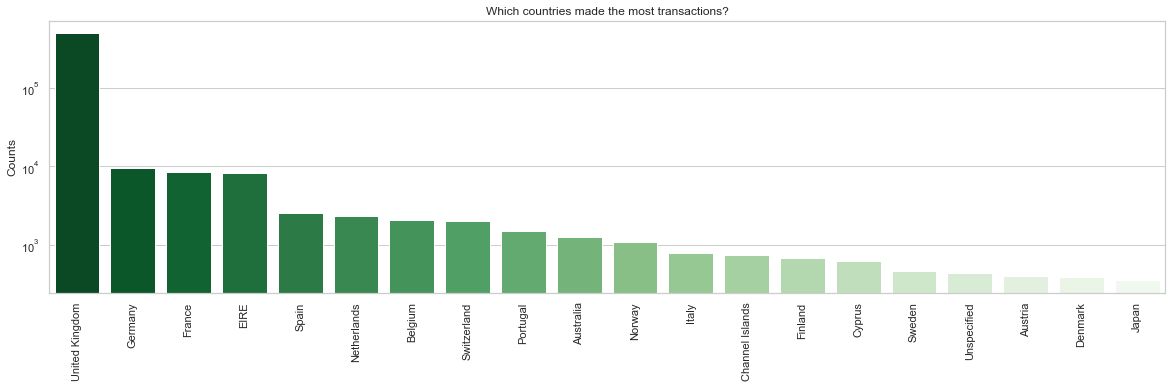

In [25]:
# посмотрим попупярные страны

df_ecommerce.Country.nunique()

country_counts = df_ecommerce.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [26]:
df_ecommerce.Country.value_counts().sort_values(ascending=False).iloc[0:10].sum() / df_ecommerce.Country.value_counts().sum()


0.984443882644503

In [27]:

# ИТОГО



# - поверхностаня инфографика показывает о явно лидерстве Британии 

# - видим долю заказов на первую европейскую 10ку -98%! я спер этот инфографику с Kaggle у американского
# спецаилиста на Kaggle,но сначал не счиал ее полезной. Но вот приведя процентное соотношение, теперь можно понять,
# зачем она ее привела. 

# - Как я помню это данные Амазона, похоже это европейское подразделение

                                                                    СМОТРЮ Unit Price

.

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UnitPrice'>

count    541909.000000
mean          4.611114
std          96.759853
min      -11062.060000
25%           1.250000
50%           2.080000
75%           4.130000
max       38970.000000
Name: UnitPrice, dtype: float64

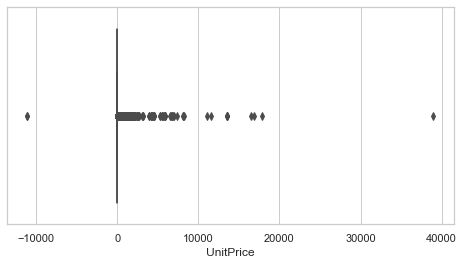

In [28]:
sns.boxplot(df_ecommerce.UnitPrice)
df_ecommerce.UnitPrice.describe()

In [29]:
#  видим есть сильные outliers , отрицательные мы знаем с чем связаны. ПОсмотрим положительные до  75 квартиль

In [30]:
# ОЦЕНИВАЕМ UnitPrice

np.quantile(df_ecommerce['UnitPrice'].sort_values(ascending=False), 0.99)
df_ecommerce.query('UnitPrice > 18').shape[0]
df_ecommerce.UnitPrice.sort_values(ascending=False).head(10)

# ИТОГО
# 1) видим,что вплоть до 99% значений  ,знаечния выше 18 долларо за товар не подымаются.
# и там присутствует   записей

# 2) всего 4790 записей товаров приходятся на остаьлные заказа где цена от 18 до 38970 долларов, за заказ.(вписаный ордер)

18.0

4790

222681    38970.00
524602    17836.46
43702     16888.02
43703     16453.71
15017     13541.33
16356     13541.33
15016     13541.33
16232     13474.79
524601    11586.50
299982    11062.06
Name: UnitPrice, dtype: float64

In [31]:

#         ===================================================================================
#               БЛОК ДОПОЛНИТЕЬНОГО  ИНТЕРЕСА

In [32]:
#     ТОВАРЫ   18-1000$

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

24.96

2159

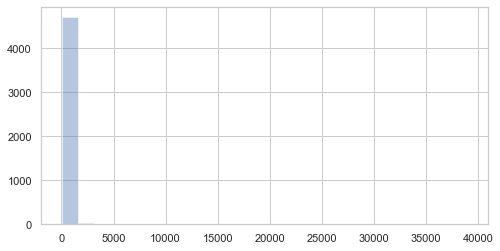

In [33]:
#1)   просто смотрим рапсоеделение меж ценами 18 и 37000
# sns.distplot(df_ecommerce.query('UnitPrice > 200  & UnitPrice < 1000').UnitPrice, kde=False, bins = 25)

q = """SELECT UnitPrice
    
    FROM df_ecommerce
    WHERE UnitPrice > 18
    ;"""
sns.distplot(ps.sqldf(q, locals()),  kde=False, bins = 25)

# 2) посмотрим моду этого процента
import statistics
statistics.mode(df_ecommerce.query('UnitPrice > 18').UnitPrice)

# 3) еще колличество заказов до моды
df_ecommerce.query('UnitPrice > 18 & UnitPrice <25').UnitPrice.count()




# ИТОГО




# посмотреть какие коды вхоодят
# помним что от 18 до 37000 всего 1 процент заказов этого датасета
# мода около 24 долларов, ну и предварительно судя по графику распределения это процента, другиз явных мод нет
#до 25долларов приходится еще 2159 ордеров из 4790, получается  около 99,5 0-25 UnitPrice покрывает.
# Далее в ценовом плане расммтривть пока не буду, интеренсо посомтреть наличие позиций (StockeCode) в эти подгруппах
# 1-18/25, 18/25 - 37000 (РПОДОЛЖИ)



In [34]:
#     ТОВАРЫ > 1000$

In [35]:
# взгляд на данные по ценнику  более  1000


# python version

df_ecommerce.loc[df_ecommerce.UnitPrice>1000].StockCode.nunique()
df_ecommerce.loc[df_ecommerce.UnitPrice>1000].StockCode.unique()
df_ecommerce.loc[df_ecommerce.UnitPrice>1000].Quantity.nunique()
df_ecommerce.loc[df_ecommerce.UnitPrice>1000].Quantity.unique()






# ИТОГО
# Коды говорят, что колл уникальных кодов для товара UnitPrice>1000 имеет значений 8, при том,что всего кодов
# в датасете ...

# Колличсетво говорит , что  для товара UnitPrice>1000 похоже,  это единичные дорогие товары, на покупку 
# оптом не похоже, часть из них отменена


8

array(['AMAZONFEE', 'M', 'BANK CHARGES', 'D', 'POST', 'DOT', 'B', 'CRUK'],
      dtype=object)

3

array([-1,  1, -2])

In [36]:
#     ТОВАРЫ > 5000$

In [37]:

# взгляд на данные по ценнику транзакицй более  5000
df_ecommerce.loc[df_ecommerce.UnitPrice>5000].StockCode.nunique()
df_ecommerce.loc[df_ecommerce.UnitPrice>5000].StockCode.unique()
df_ecommerce.loc[df_ecommerce.UnitPrice>5000].Quantity.nunique()
df_ecommerce.loc[df_ecommerce.UnitPrice>5000].Quantity.unique()



# ИТОГО
# похоже, что это это единичные дорогие товары, на покупку оптом не похоже, часть из них отменена

4

array(['AMAZONFEE', 'POST', 'M', 'B'], dtype=object)

2

array([-1,  1])

In [38]:
#     ДЛЯ ИНТЕРЕСА СМОТРЮ КОДЫ ПОЗИЦИЙ ПРИСУЩИЕ ТОЛЬКО ЗА 99 перцентилем

In [39]:
#посмотрю ка что за коды и объемы после 99% перцентиля цены товара

# 1)
# print( f" коды попавщие в 1% {df_ecommerce.query('UnitPrice > 18  & UnitPrice < 999.999').StockCode. unique()}")

print(f" колличество уник кодов в 1% заказов {df_ecommerce.query('UnitPrice > 18  & UnitPrice < 999.999').StockCode.nunique()}")


# 2)
# в целом колл кодов и уникальных объемов в выборке
print(f" колличество уникальных кодов во всем дата сете {df_ecommerce.StockCode.nunique()}")




# посмотрим какие коды товара не повторяются и присущи ИСКЛЮЧИТЕЛЬНО ПОСЛЕ 99% цены товара

one = df_ecommerce.query('UnitPrice < = 18').StockCode.unique()
two = df_ecommerce.query('UnitPrice > 18  & UnitPrice < 999.999').StockCode.unique()




   
# ИТОГО




# А) Видим, что 200 уник кдовой товаров из 4070, повторяются и используются после 99% перцентиля UnitPrice товара

# Б) Видим что 22 уникальных StockCode были присущи заказам только дороже 18 $, и можно поисследовать их участие 
# и влияение позже
list_stickcode_more18 = []
for b in two:
    if b not in one:
#         print(f" позиции  присущие только крайним значениям прайс  {b} " )
        list_stickcode_more18.append(b)
len(list_stickcode_more18)


# B) Ну и для меня, не имея инлфы бизнес нишы , было несколько удивительно  - видим что цены товаров не ф
# иксированные, но StockCode один и тот же. В потребительских магазинах 1 код=1товар, здесь возможно предположить:
# это или  товары разных размеров но одинов или услуги не фиксированно объема....

for i in list_stickcode_more18:
    print(df_ecommerce[df_ecommerce['StockCode'] == i]['UnitPrice'].nunique() )
    print({df_ecommerce[df_ecommerce['StockCode'] == i]['StockCode'].iloc[0]: list(df_ecommerce[df_ecommerce['StockCode'] == i]['UnitPrice'])})

 колличество уник кодов в 1% заказов 200
 колличество уникальных кодов во всем дата сете 4070


22

4
{'22803': [35.75, 35.75, 35.75, 35.75, 35.75, 35.75, 35.75, 35.75, 39.95, 39.95, 35.75, 39.95, 33.29, 39.95, 33.29, 33.29, 35.75, 33.29, 39.95, 35.75, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 82.5, 39.95, 39.95, 39.95]}
3
{'22761': [24.95, 21.95, 21.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 49.13, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 24.95, 21.95, 24.95, 21.95, 24.95]}
1
{'84963A': [42.95]}
6
{'84078A': [76.55, 34.95, 34.95, 34.95, 76.55, 34.95, 34.95, 74.96, 39.95, 39.95, 74.96, 39.95, 74.96, 39.95, 34.95, 39.95, 39.95, 34.95, 74.96, 39.95, 39.95, 34.95, 34.95, 39.95, 34.95, 34.95, 34.95, 39.95, 39.95, 74.96, 74.96, 74.96, 39.95, 39.95, 39.95, 74.96, 39.95, 74.96, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 39.95, 58.29, 39.95, 39.95, 58.29, 58.29, 39.95, 34.95, 39.95, 58.29, 34.95, 39.95, 34.95, 58.29, 58.29, 53.55, 39.95, 39.95, 39.95, 58.29, 58.29, 34.95, 34.95, 39.95, 58.29, 39.95, 39.95, 39.95, 34.95,

In [40]:
#         ===================================================================================
#               КОНЕЦ БЛОКА ДОПОЛНИТЕЛЬНОГО  ИНТЕРЕСА

                                                                         СМОТРЮ КОЛИЧЕСТВО

.

In [41]:
df_ecommerce.Quantity.describe()
# вижу что и man and max имеют одинаковые значения.взгляну


# df_ecommerce.sort_values('Quantity').head(1)
# df_ecommerce.sort_values('Quantity', ascending=False).head(1)

q = """SELECT *
    
    FROM df_ecommerce
    ORDER BY Quantity
    LIMIT 1
    ;"""
ps.sqldf(q, locals())


q = """SELECT *
    
    FROM df_ecommerce
    ORDER BY Quantity  DESC
    LIMIT 1
    ;"""
ps.sqldf(q, locals())



# ИТОГО

# имеем два последовательных заказа, оформлен  и затем отменен


count    541909.000000
mean          9.552250
std         218.081158
min      -80995.000000
25%           1.000000
50%           3.000000
75%          10.000000
max       80995.000000
Name: Quantity, dtype: float64

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,C581484,23843,-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,581483,23843,80995,12/9/2011 9:15,2.08,16446.0,United Kingdom


In [42]:
df_ecommerce.sort_values('Quantity').head(5)


#ИТОГО


# вижу что некоторые заказы имеют Отрицательные.
# ВижУ Нулевые значения UnitPrice и CustomerID, еслИ чТО, можно было бы попробовать их исключить
# при последующем расчете  revenue



,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom
61624,C541433,23166,-74215,1/18/2011 10:17,1.04,12346.0,United Kingdom
225529,556690,23005,-9600,6/14/2011 10:37,0.00,0.0,United Kingdom
225530,556691,23005,-9600,6/14/2011 10:37,0.00,0.0,United Kingdom
4287,C536757,84347,-9360,12/2/2010 14:23,0.03,15838.0,United Kingdom


In [43]:
#        1) смотрю расперделение количества заказов без учета отрицательных(отмененных) 




/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

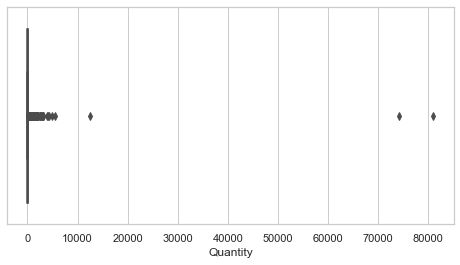

In [44]:
#df_ecommerce.sort_values('Quantity')[2:-2]
sns.boxplot(df_ecommerce.query("Quantity > 0").sort_values('Quantity', ascending = False).Quantity)

# ИТОГО видим большие выборосы


29.0

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Quantity'>

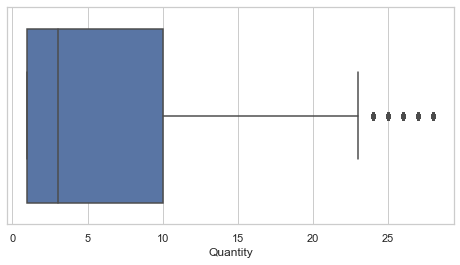

In [45]:
# можно посмотреть 95 перцентиль основного колл заказов и их рапсределение
np.quantile(df_ecommerce['Quantity'].sort_values(ascending=False), 0.95)


sns.boxplot(df_ecommerce.query(" Quantity > 0& Quantity < 29").sort_values('Quantity', ascending = False).Quantity)



# ИТОГО

#вот наблюдается картина,меДиана около 3х, не нормальное рапсределение,
#  картина рапсределения включает 95% наблюдений колличества заказов

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Quantity'>

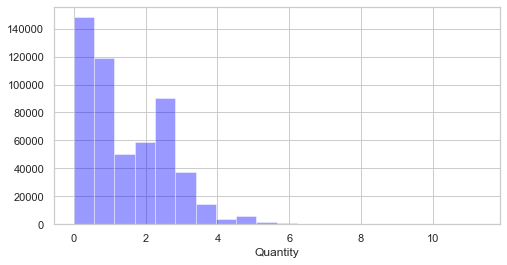

In [46]:
# Попробуем логарифмировать шкалу для  всех заказов > 0


sns.distplot(np.log(df_ecommerce.query("Quantity > 0  ").sort_values('Quantity', ascending = False).Quantity),  bins=20, kde=False, color="blue")



# ИТОГО

# логарифмическое , все ранво не нормальное 
#  присутвует некая бимодальноcть в количесте заказов, счем связано не выяснено

# пристувет right sckewed рапсределение, где часто мода < медианы, а среднее > и моды и медианы




<AxesSubplot:xlabel='Quantity'>

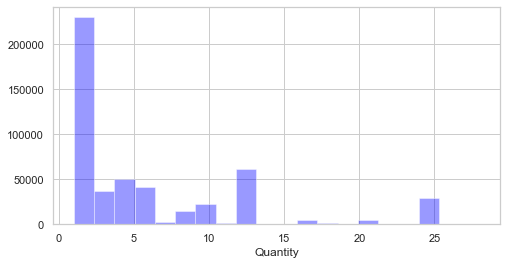

In [47]:
sns.distplot(df_ecommerce.query("Quantity >0 & Quantity <29 ").sort_values('Quantity', ascending = False).Quantity,  bins=20, kde=False, color="blue")



# ИТОГО 

# в 95% процентах заказов можно визуально предположить что от 1 до  6/  13 единиц/25 единиц в колличестве 
# заказов, попадаются чаще всего


                                                                            СМОТРЮ ВЫРУЧКУ

In [48]:
# ПРЕДПОЛОЖЕНИЕ

# # рассчитаем выручку, за неделю и месяц. Считая каждое значение -  будет попадать 
# # на Заказанно-Отмененные, и Заказы со странным нулевым прайсом. Если первые взаимо вычтутся,
# то вторые будт давать 0 при умножении, однако в статистике количества заказов они будут
#   присутсвовать, так что, МОЖНО ПРЕДПОЛОЖИТЬ , что  это отношение 
#  Доход по ТОвару/Колл заказов будет  несколько misleading


df_ecommerce_all_revenue = df_ecommerce.copy()
df_ecommerce_all_revenue.InvoiceDate = pd.to_datetime(df_ecommerce_all_revenue['InvoiceDate'])

df_ecommerce_all_revenue["Week"] = df_ecommerce_all_revenue.InvoiceDate.dt.week

df_ecommerce_all_revenue["Month"] = df_ecommerce_all_revenue.InvoiceDate.dt.month

df_ecommerce_all_revenue["Year"] = df_ecommerce_all_revenue.InvoiceDate.dt.year

df_ecommerce_all_revenue["Day"] = df_ecommerce_all_revenue.InvoiceDate.dt.day

df_ecommerce_all_revenue["Number_of_quarter"] = df_ecommerce_all_revenue.InvoiceDate.dt.quarter


/var/folders/81/czt11kms0_30wrpb138499r40000gn/T/ipykernel_17517/3961471305.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_ecommerce_all_revenue["Week"] = df_ecommerce_all_revenue.InvoiceDate.dt.week


In [49]:
# создаю округленную дату для счета, удаляю прежнюю

df_ecommerce_all_revenue["Date_around"] = pd.to_datetime(df_ecommerce_all_revenue[['Year', 'Month', 'Day']])
df_ecommerce_all_revenue.drop(columns='InvoiceDate', inplace = True)

In [50]:
# считаю выручку с каждой операции

df_ecommerce_all_revenue["revenue"] = df_ecommerce_all_revenue.Quantity*df_ecommerce_all_revenue.UnitPrice


                                 распределение вы ручки ПО НЕДЕЛЯМ ЗА ГОД

<AxesSubplot:xlabel='Week', ylabel='revenue'>

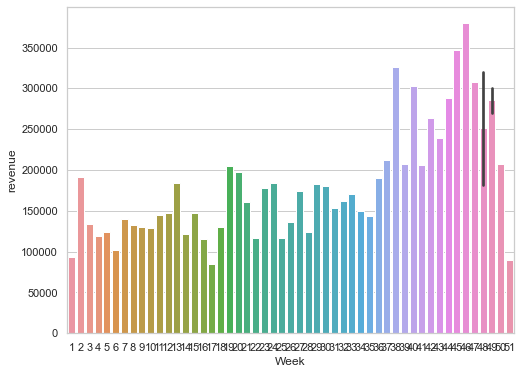

In [51]:
# 1 проба)
sns.set(rc={'figure.figsize':(8,6)}, style = "whitegrid")

sns.barplot(data = df_ecommerce_all_revenue.groupby(['Year', 'Week'] , as_index=False) \
            .revenue.sum().sort_values('Year', ascending = True), x = 'Week', y = 'revenue')


# ИТОГО
# вижу некоторое наложение недель 2010 года на недели 2011



In [52]:
# 2 проба)
#попытка упорядочить ХРОНОЛОГИЧЕСКИ через явное последовательность значений недели
# в фрейме 
df_ordered_revenue_by_weeks = {'weeks':df_ecommerce_all_revenue.groupby(['Year', 'Week'], as_index=False). \
              agg({'revenue':'sum'}).sort_values(['Year', 'Week'], ascending = True).Week.values,
                               
                              'revenue':df_ecommerce_all_revenue.groupby(['Year', 'Week']). \
              agg({'revenue':'sum'}).sort_values(['Year', 'Week'], ascending = True).revenue.values}

df_ordered_revenue_by_weeks = pd.DataFrame(data = df_ordered_revenue_by_weeks)
# sns.barplot(data = df_ordered_revenue_by_weeks, x = 'weeks', y = 'revenue')#, order = df_ordered_revenue_by_weeks['weeks'])


# ИТОГО
# попытка не удалась -   Барплот наложил по умолчанию по своему усмотрению

<AxesSubplot:xlabel='Week', ylabel='rev'>

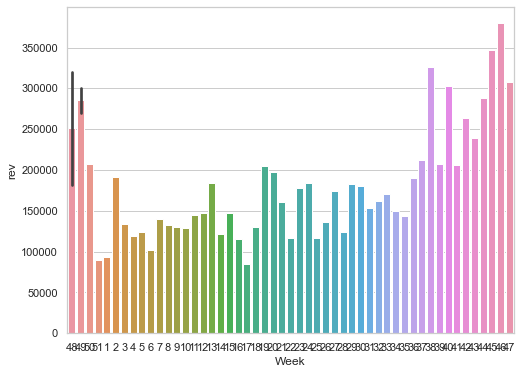

In [53]:
# 3 проба)
 
# python version 

# Хорошо, что есть  аргумент order, с помощью которого можно упорядочить недели, что и делаю
# sns.barplot(data = df_ecommerce_all_revenue.groupby(['Year', 'Week'] , as_index=False) \
#             .revenue.sum().sort_values(['Year', 'Week'], ascending = True), \
#             x = 'Week', y = 'revenue', \
#             order = df_ecommerce_all_revenue['Week'].unique())


#sql
q = """SELECT Week,
        SUM(revenue) AS rev
    
    FROM df_ecommerce_all_revenue
    GROUP BY Year, Week
    ORDER BY Year, Week;
     
    """

# ИТОГО

#1)  sns.barplot(data = ps.sqldf(q, locals()), x = 'Week', y = 'rev')  
# вот интересный такой, sqlвыглядит лаконичнее и понятнее, но sns barplot портит распредение Год/неделя по 
# умолчанию


# 2) тогда задам порядок
sns.barplot(data = ps.sqldf(q, locals()), x = 'Week', y = 'rev', \
            order = ps.sqldf(q, locals())['Week'].unique())
sns.set(rc={'figure.figsize':(12,6)}, style = "whitegrid")





# ИТОГО

# видим 1) высокие значения ближе к концам лет и примерно,
#         2) тенденцию увеличения в последнем квартале,
#         3) сравнительно равные колебания объема  1-3 квартала

<AxesSubplot:xlabel='revenue', ylabel='revenue'>

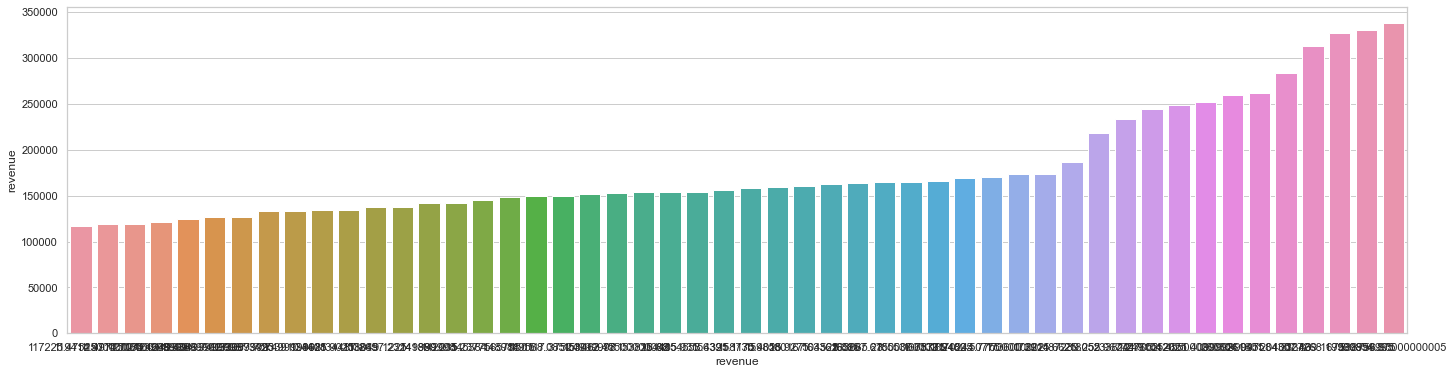

In [54]:
#   И ДЛЯ СРАВННЕИЯ СГЛАЧЖЕННАЯ  МЕСЯЧНАЯ СУММА РАСЧИТАННАЯ ПО НЕДЕЛЯМ С ОКНОМ В 4 НЕДЕЛИ



ioio = df_ecommerce_all_revenue.groupby(['Year', 'Week']).revenue.sum()
data = ioio.rolling(4 ).mean()
data = data.reset_index(level=0, drop=True)  #- решает проблему мульти индекса,котрый не хочет читаь snn

data = data.reset_index(drop=True) # - решает проблему дублирования уникалбного индекса(в моем случае недель)
#https://github.com/mwaskom/seaborn/issues/2652
sns.set(rc={'figure.figsize':(24,6)}, style = "whitegrid")
sns.barplot(data = data, x = data.index, y = data  )



# ИТОГО



# 1)отобразил оконную функцию, считающее месячнцю среднюю(срежнее за 4 недели), но результат первых четырех
# недель датасета(последние недели декабрся 2010), здесь невидим - это стоит помнить.
# 2) В целом, видим медленный рост средего знаечния revenue по месяцам и знаечительный в 4 квартале

                                   распределение выручки ПО ДНЯМ ЗА ГОД

In [55]:
#          смотрю выручку по дням недели за весь год

#добавляю дни недели 
df_ecommerce_all_revenue["Weekday"] = pd.to_datetime(df_ecommerce['InvoiceDate']).dt.weekday


<AxesSubplot:xlabel='Weekday', ylabel='revenue'>

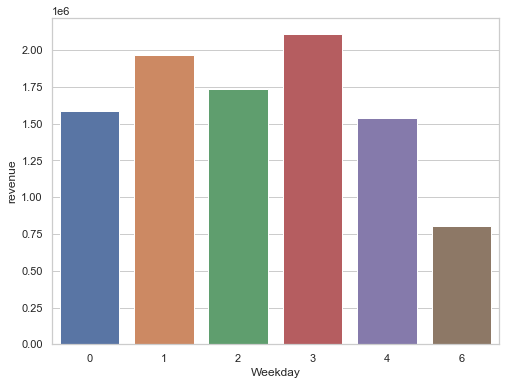

In [56]:
sns.set(rc={'figure.figsize':(8,6)}, style = "whitegrid")
sns.barplot(data = df_ecommerce_all_revenue.groupby('Weekday' , as_index=False) \
            .revenue.sum(), x = 'Weekday', y = 'revenue')

# видим что в ЦЕЛОМ за весь год, моды - вторник и четверег, низкая выручка - воскресенье

                                   распределение выручки ПО КВАРТАЛАМ

In [57]:


# Отображаю  revenue  через boxplot  ПО КВАРТАЛАМ (медиана , межкваритльный размах)
#       *** но ПОСЧИТАНО ПО НЕДЕЛЯМ -unit of the sum




'ВМЕСТО этого абзаца , просто аргумент Manage_tikcs'

{'whiskers': [<matplotlib.lines.Line2D at 0x12e483940>,
 'caps': [<matplotlib.lines.Line2D at 0x12e46f0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x12e4835b0>,
 'medians': [<matplotlib.lines.Line2D at 0x12e46f7c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12e46fb50>,
 'means': []}

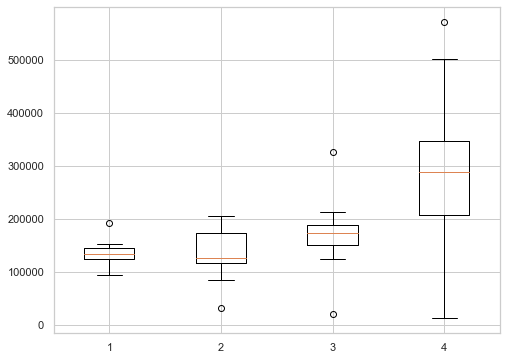

In [58]:

# ЗАМЕЧАНИЯ:

#     1)если просто подать прорядковые данные транзакций, то усы буду в минусе, отображая 
#рпсредление ИСХОДНЫХ ДАННЫХ / ДАННЫХ ПОДДАННЫХ НА ВХОД

#     2) посему, уничтожу минусы суммированием за недели и данных на вход будут ОТРАЖАТЬ 
# ПОВЕДЕНИЕ ДАННЫХ С НЕДЕЛЬНЫМ ШАГОМ. Но сейчас я просто хочу графически отобразить
# 50 и 25/75% относильно друг другоа(кварталов),для восприятия. remeber it


  
#   Способ 1 ------------------------------------------------------

# sns.boxplot(data = df_ecommerce_all_revenue.query('Number_of_quarter == 3'). \
#             groupby('Weekday' , as_index=False).revenue.sum(), color = 'blue', orient='h' )

# sns.boxplot(data = df_ecommerce_all_revenue.query('Number_of_quarter == 1'). \
#             groupby('Weekday' , as_index=False).revenue.sum(), color = 'green', orient='h' )

# sns.boxplot(data = df_ecommerce_all_revenue.query('Number_of_quarter == 2'). \
#             groupby('Weekday' , as_index=False).revenue.sum(), color = 'black', orient='h' )

# sns.boxplot(data = df_ecommerce_all_revenue.query('Number_of_quarter == 4'). \
#             groupby('Weekday' , as_index=False).revenue.sum(), color = 'grey' , orient='h')

# НЕПОДОШЕЛ
# 2 and 3 накладываются,  прозпачны фон сделать, либо располодить их вертикально друг друга"""



#   Способ 2 ------------------------------------------------------

    
tips0 = df_ecommerce_all_revenue.groupby('Number_of_quarter', as_index = False) \
          .revenue.sum()
# sns.boxplot(data = tips0, x = 'Number_of_quarter', y = 'revenue')#, pallete = "Set3")

# получились миллионые числа, boxplot не разборчиво отобразил
# НЕПОДОШЕЛ



#   Способ 3 ------------------------------------------------------


from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt

# def millions(x, pos):
#     'The twro args are value and tick position'
#     return '%1.1fM' % (x*1e-6)

# formatter = FuncFormatter(millions)
# fig,ax = plt.subplots()
# ax.yaxis.set_major_formatter(formatter)
"""ВМЕСТО этого абзаца , просто аргумент Manage_tikcs"""

# НЕПОДОШЕЛ



#   Способ 4 ------------------------------------------------------


#   ИТОГО, более понятный способ.

quart1 = df_ecommerce_all_revenue.query('Number_of_quarter == 1 ') \
        .groupby('Week', as_index = False).revenue.sum()

quart2 = df_ecommerce_all_revenue.query('Number_of_quarter == 2 ') \
        .groupby('Week', as_index = False).revenue.sum()

quart3 = df_ecommerce_all_revenue.query('Number_of_quarter == 3 ') \
        .groupby('Week', as_index = False).revenue.sum()

quart4 = df_ecommerce_all_revenue.query('Number_of_quarter == 4 ') \
        .groupby('Week', as_index = False).revenue.sum()



plt.boxplot([quart1.revenue.values, quart2.revenue.values, \
                   quart3.revenue.values, quart4.revenue.values])




In [59]:
"""НАПОМИНАНИЕ ДЛЯ СЕБЯ"""
# тк Боксплот это компактный вид распределения, можно оценить
#  упорядоченую Медиану втсречающихся значений
#  размер робастного межквартильного размаха
#   ассиметрию,при явном смещении ммедианы к квартилю
    
#  *** вместе медиана и IR ,можно использовать вместо Мат ожидания и Дисперсии, у dist с 
#      большими  выбросами или невозможности посчитаь Мат ожидание/дисперсию

'НАПОМИНАНИЕ ДЛЯ СЕБЯ'

In [60]:


# Отображаю  revenue  через плотнось веротяностей распределения значений  (ПО КВАРТАЛАМ)

#    *** но ПОСЧИТАНО ПО НЕДЕЛЯМ (помни о колличестве ordered-canceled )
#      *** distplot возвращает плотность вероятности распределений
#          *** данные колличественные, редполагаю - имею шкалу равных отношений( ratio scale)
#             ибо имеется аБсолютный ноль на шкале( выручка не может уйти в минус, расходы здесь не учитываются)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

<AxesSubplot:xlabel='revenue', ylabel='Density'>

<AxesSubplot:xlabel='revenue', ylabel='Density'>

<AxesSubplot:xlabel='revenue', ylabel='Density'>

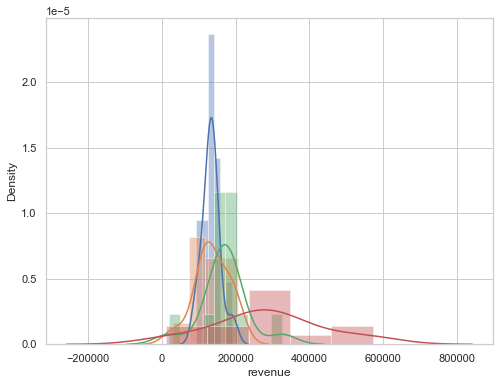

In [61]:

import warnings
warnings.filterwarnings('ignore')

sns.distplot(quart1.revenue)
sns.distplot(quart2.revenue)
sns.distplot(quart3.revenue)
sns.distplot(quart4.revenue)



# ИТОГО



# 4й квартал имеет более "равномерные" значения плотности рапсределения размеров выручки
#  для широкого диапазона сумм. Т.е не малое количество покупок на широкий диапазон сумм выручки
# типа 10-15,15-20,20-30,30-50 тысяч,  в отличие от остлаьных кварталов с основным диапазоном
# 10 -20тысяч

In [62]:

#     ИТОГО (предварительные предположения)





# 1) видим, что первый квартал имеет сравнительно меньшую диспресию (все в порядке с данными) ???

# 2) у второго квартала  25% близок к медиане, есть ассиметрия  и  вариантивность НЕДЕЛЬНЫХ признаков


# 3) Третий, более симметричный, с outliers

# 4) четвертый имеет увеличенную(по отношение к другим) дисперсию, с огромным размахом
#     - если верхний ус,еще можнобъяснить нарастающим оббъемом покупок( срез по ннижеделям)
#     - то нижний ус, несколько нетипичин, 39 неделя, всего 11000 прибыли, причастых минимальных
#     показателям в 200000/нед.
   


,Date_around,summ
0,2011-10-02 00:00:00.000000,11623.58


<AxesSubplot:xlabel='Date_around', ylabel='summ'>

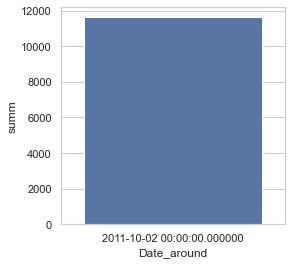

In [63]:
# ЭТОТ БЛОК С ВИЗУАЛИЗАЦИЕЙ  Я ВЫРЕЗАЛ, НО ВОТ НА ЧТО Я ОБРАТИЛ ВНИМАНИЕ И ПОТРАТИЛ ВРЕМЯ:
# ХОТЕЛ ПОСОМТРЕТЬ ВЕЛИЧИНЫ ВЫРУЧКИ ПО ДНЯМ НЕДЕЛИ /ЗА НЕДЕЛЮ / В КВАРТАЛЕ 
#  ВОТ КАК ОКАЩАЛОСЬ ВЫГЛЯДИТ 39 НЕДЕЛЯ

q = """
    SELECT Date_around, SUM(revenue) AS summ
    FROM df_ecommerce_all_revenue
    WHERE Year == 2011 AND Number_of_quarter == 4 AND Week == 39
    GROUP BY Date_around
    ;"""

ps.sqldf(q, locals())
sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
sns.barplot(data =ps.sqldf(q, locals()),  x = 'Date_around', y = 'summ')




,Date_around,summ
0,2011-10-03 00:00:00.000000,64214.78
1,2011-10-04 00:00:00.000000,48240.84
2,2011-10-05 00:00:00.000000,75244.43
3,2011-10-06 00:00:00.000000,55306.28
4,2011-10-07 00:00:00.000000,47538.02
5,2011-10-09 00:00:00.000000,11922.24


<AxesSubplot:xlabel='Date_around', ylabel='summ'>

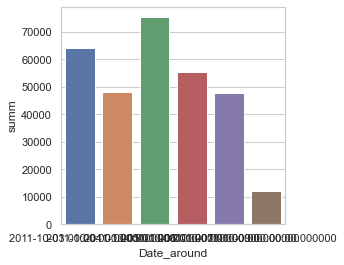

In [64]:
# ТАК ВЫГЛЯДЯТ ОСТАЛЬНЫЕ

q = """
    SELECT Date_around, SUM(revenue) AS summ
    FROM df_ecommerce_all_revenue
    WHERE Year == 2011 AND Number_of_quarter == 4 AND Week == 40
    GROUP BY Date_around
    ;"""
ps.sqldf(q, locals())

sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
sns.barplot(data =ps.sqldf(q, locals()),  x = 'Date_around', y = 'summ')



                                    расределение выручки и  ПО ДНЯМ И ПО КВАРТАЛАМ

Text(0.5, 0.98, 'Vertically stacked subplots')

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

<AxesSubplot:xlabel='Number_of_quarter', ylabel='revenue'>

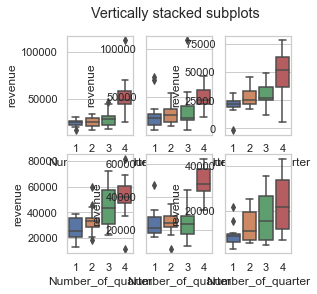

In [65]:

#   1) использую БОКСПЛОТ  - агрегированные даные за КАЖДЫЙ день по кварталам, с учетом ВСЕХ тразанкций, влючая
# отмненный и undefined страны, нулевые прайсы



#   2)  Наблдений в каждой выборке получается не очень много,
#     но занчения ревенью  агрегированны из большого количества уникальных транзакций(Unit - InvoiceNo)
 

monday = df_ecommerce_all_revenue.query(' Weekday == 0').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum() 
tuesday =  df_ecommerce_all_revenue.query(' Weekday == 1').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum()
wednesday =   df_ecommerce_all_revenue.query(' Weekday == 2').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum()            
thursday  = df_ecommerce_all_revenue.query(' Weekday == 3').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum()            
friday = df_ecommerce_all_revenue.query(' Weekday == 4').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum()            
sunday = df_ecommerce_all_revenue.query(' Weekday == 6').groupby(['Number_of_quarter', 'Date_around'], as_index = False).revenue.sum()            



fig, axes = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')

sns.set(rc={'figure.figsize':(20,20)}, style = "whitegrid")

sns.boxplot(ax=axes[0, 0], data = monday, x = 'Number_of_quarter', y = 'revenue')
sns.boxplot(ax=axes[0, 1], data = tuesday, x = 'Number_of_quarter', y = 'revenue')
sns.boxplot(ax=axes[0, 2], data = wednesday, x = 'Number_of_quarter', y = 'revenue')
sns.boxplot(ax=axes[1, 0], data = thursday, x = 'Number_of_quarter', y = 'revenue')
sns.boxplot(ax=axes[1, 1], data = friday, x = 'Number_of_quarter', y = 'revenue')
sns.boxplot(ax=axes[1, 2], data = sunday, x = 'Number_of_quarter', y = 'revenue')


# * used https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8




#    ИТОГО (ПРОМЕЖУТОЧНЫЕ ВЫВОДЫ)



#  1) Не смотря на кажущуюся повышенную вариантивность среды,четверга и воскресения, и пред
# положительно покупательной активности(выручки), дни с наибольшим значеним медианы выручки(за год)
#  - четверг, вторник и среда. 

# 2)Воскресенье имеет в 2 раза меньшую выручку.

In [66]:





"НЕОЖИДАННАЯ НАХОДКА ))) "

# P.S. нашлась в блоке визуализации,который я вырезал и ранее упоминал


# SATURDAY


#1)  tips = df_ecommerce_all_revenue.query(' Weekday == 5').groupby(['Number_of_quarter', 'Date_around'], as_index = False) \
#             .revenue.sum()
# sns.boxplot(data = tips, x = 'Number_of_quarter', y = 'revenue')#, pallete = "Set3")  - НЕПОЛУЧИЛОСЬ



# 2)      интересно, графике не построен, ибо есть пустые последовательности 
# ValueError: min() arg is an empty sequence
#     Неокторые агреггированные знаечния этих данных принимаюn Nan Nat


# 3) при попытке посмотреть на значения, получаю пустой сабсет
# df_ecommerce_all_revenue.query(' Weekday == 5').groupby(['Number_of_quarter', 'Date_around'], as_index = False) \
#             .revenue.sum()
""" ВЫЯСНЯЕТСЯ , ЧТО КТО ТО СПЕР СУББОТУ???"""



#      КОСВЕЕННЫЕ ПОДТВЕРЖДЕНИЯ НЕПОЛНОСТИ ДАТАСЕТА  С kaggle

# df_ecommerce_all_revenue.Weekday.unique()   - выясняется, что дня номер 5, субботы, НЕТ!
    
#df_ecommerce_all_revenue.groupby('Date_around').revenue.sum().head(15)
# df_ecommerce_all_revenue.groupby('Date_around').revenue.sum().tail(35) - в датах нет каждого 7го дня

# кажется у трех человек, работы которых смотрел, не было выявлено этого факта(кажется)

'НЕОЖИДАННАЯ НАХОДКА ))) '

' ВЫЯСНЯЕТСЯ , ЧТО КТО ТО СПЕР СУББОТУ???'

In [67]:
#         ===================================================================================
#                БЛОК ДОПОЛНИТЕЛЬНОГО  ИНТЕРЕСА 2- еще одна проверка "полноты/равности" данных



df_ecommerce_all_revenue.groupby('Weekday').revenue.sum().sort_values(ascending = False)

# 1)  на всякий пожарный, после обнаржуения отсутсвия Субботы,  проверим соотношение количества данных, 
# ввыборках по дням
      
len(df_ecommerce_all_revenue.query('Weekday==0'))
len(df_ecommerce_all_revenue.query('Weekday==1'))
len(df_ecommerce_all_revenue.query('Weekday==2'))
len(df_ecommerce_all_revenue.query('Weekday==3'))
len(df_ecommerce_all_revenue.query('Weekday==4'))
len(df_ecommerce_all_revenue.query('Weekday==5'))
len(df_ecommerce_all_revenue.query('Weekday==6'))

# ИТОГО 
# за год видим что вариация в 7 -20% от максимум и почти в 50% от максимума дляч воскресенья, ну и нет субботы



# 2)на всякий пожарный, проверим соотношение количества дней по дням недели

print(f" mondays number {len(df_ecommerce_all_revenue.query('Weekday==0').groupby('Date_around'))} ")
print(f" tuesdays number {len(df_ecommerce_all_revenue.query('Weekday==1').groupby('Date_around'))} ")
print(f" wednesdays number {len(df_ecommerce_all_revenue.query('Weekday==2').groupby('Date_around'))}")
print(f" thursdays number {len(df_ecommerce_all_revenue.query('Weekday==3').groupby('Date_around'))} ")
print(f" fridays number {len(df_ecommerce_all_revenue.query('Weekday==4').groupby('Date_around'))}")
print(f" sundays number {len(df_ecommerce_all_revenue.query('Weekday==6').groupby('Date_around'))} ")

# ИТОГО
# 
# 1) вот посмотрели мы "1) соотношение количества данных, ввыборках по дням" и видим,как хромает воскресение
# по колличеству транзакций - опять не полные данные,
 
# 2) но пунтк 2 "соотношение количества дней по дням недели" - говорит, что колл воскресений в датасете значительно\
# не отклоняется


#         ===================================================================================
#               КОНЕЦ БЛОКА ДОПОЛНИТЕЛЬНОГО  ИНТЕРЕСА

Weekday
3    2112519.000
1    1966182.791
2    1734147.010
0    1588609.431
4    1540610.811
6     805678.891
Name: revenue, dtype: float64

95111

101808

94565

103857

82193

0

64375

 mondays number 47 
 tuesdays number 52 
 wednesdays number 53
 thursdays number 53 
 fridays number 50
 sundays number 50 


In [68]:
#  ИТОГО (ПРОМЕЖУЧТОЫНЕ ВЫВОДЫ)



# 1) удивительно, но amazon или владелец дадасета, октрый опубликовал, выкинул субботу из него
# Мы имеем не полные данные, кторые в зависимости от цели, омгут сильно повлиять на выводы.

# 2) Не смотря на кажущуюся повешенную вариантивно среды,четверга и воскресения, и пред
# положительно покупательной активности(выручки), дни с наибольшим значеним выручки(за год)
#  - четверг, вторник и среда. Воскресенье имеет в 2 раза меньшую выручку.

# 3)четверг в 3 квартиле удивительно активный, а воскресение в первом очень узко
#(данных достаточно, частые отмены? просто низкий объем? - нужно время и инртерс чтоб проверить)

# 4) МЕДДИАННЫЕ ЗНАЧЕНИЯ понедельника и вторника  и среды 1-3 кварталов, остаются в очень
# близком диапазоне и  имеют минимальные отличия в ЗНАЧЕНИЯ РАМЗЕРА медианной выручки
#  по боксплоту  и частоте значений выручки дневных сумм -  distplot kde.
# четверг, самый волотильный день и принимает несколько мод

# 5) 4й квартал, как ожидалось из предыдущего боксплота, медианно больше по выручке по
# всем дням






                                                    КОРОТКИЙ ПРОИЗВОЛЬНЫЙ ДАШБОРД В ЗАКЛЮЧЕНИЕ
                                                    


' учел CustomerID !=0 '

<AxesSubplot:xlabel='Month', ylabel='CustomerID'>

,Month,CustomerID
0,1.0,0.376561
1,1.0,0.265059
2,1.0,0.242898
3,1.0,0.224562
4,1.0,0.219336
5,1.0,0.245105
6,1.0,0.304064
7,1.0,0.216019
8,1.0,0.187234
9,1.0,0.165404


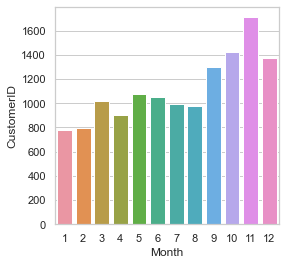

In [69]:
""" учел CustomerID !=0 """

# а) колл уник покупателей каждый месяц

# numb_of_uniq_users = df_ecommerce_all_revenue.groupby('Month', as_index=False).CustomerID.nunique()
numb_of_uniq_users = df_ecommerce_all_revenue.query('CustomerID != 0').groupby('Month', as_index=False).CustomerID.nunique()


sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
sns.barplot(data =numb_of_uniq_users,  x = 'Month', y = 'CustomerID')

# НО ПОМНИМ !
# df_ecommerce.CustomerID.isna().sum()- около 25%!

# МЕНЕЕ ИНФОРМАТИВНО ПОЛУЧАЕТСЯ - ОСОБЕННО ЕЛСИ ПОСМОТРЕТЬ В КАКОМ МЕСЯЦЕ БОЛЕЬШЕ ВСЕГО "ПРОПАВШИХ"
#помним что я сделал fillna 0

df_ecommerce_all_revenue.query('CustomerID == 0').groupby('Month', as_index=False).CustomerID.count()/df_ecommerce_all_revenue.groupby('Month', as_index=False).CustomerID.count()



# ИТОГО


# видим что вариация, от 6т до 23т не отмечанных, довольно волатильно. Но все таки посмотрим проценты.
# Надо как то учесть эту инфу для будущих задач




<AxesSubplot:xlabel='Month', ylabel='InvoiceNo'>

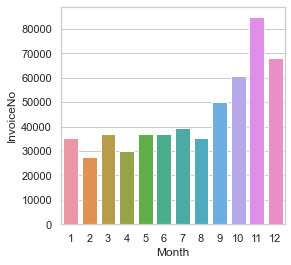

In [70]:
# б) колл заказаов кажд месяц
numb_of_orders = df_ecommerce_all_revenue.groupby('Month', as_index=False).InvoiceNo.count()

sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
sns.barplot(data =numb_of_orders,  x = 'Month', y = 'InvoiceNo')


<AxesSubplot:xlabel='Month', ylabel='revenue'>

'\xa0НАПМИНАНИЕ СЕБЕ: не искажается из за битых CustomerID'

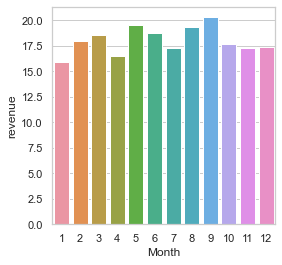

In [71]:
#     в) средняя сумма заказа за месяц

mean_amount_orders = df_ecommerce_all_revenue.groupby('Month', as_index=False).revenue.mean()

sns.set(rc={'figure.figsize':(4,4)}, style = "whitegrid")
sns.barplot(data =mean_amount_orders,  x = 'Month', y = 'revenue')


# ИТОГО

# не смотря на то, что остаьлные графики деймонстируют тенденции,средняя сумма заказа, в довольно узких
# рамках   
""" НАПМИНАНИЕ СЕБЕ: не искажается из за битых CustomerID"""


' учел CustomerID !=0 '

<AxesSubplot:ylabel='ratio'>

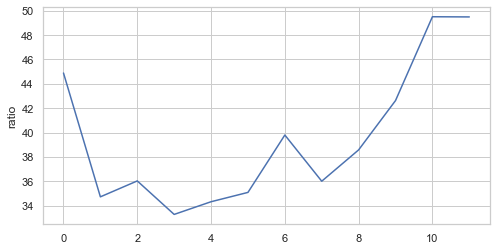

In [72]:
""" учел CustomerID !=0 """

#     г)   ср колличество  заказов  юзеров к ср колл уник покупателей за месяц?

ratio_orders_to_customers = pd.DataFrame() #(columns = ['numb_of_oreders', 'numb_uniq_users_count'])

ratio_orders_to_customers['numb_of_oreders']= df_ecommerce_all_revenue.groupby(['Month'], as_index=False).InvoiceNo.count()['InvoiceNo']
ratio_orders_to_customers['numb_uniq_users_count' ] = df_ecommerce_all_revenue.query('CustomerID != 0').groupby(['Month'], as_index=False)['CustomerID'].nunique()['CustomerID']
ratio_orders_to_customers['ratio'] = ratio_orders_to_customers['numb_of_oreders'] / ratio_orders_to_customers['numb_uniq_users_count' ]

sns.set(rc={'figure.figsize':(8,4)}, style = "whitegrid")
sns.lineplot(data =ratio_orders_to_customers,  x = ratio_orders_to_customers.index , y = ratio_orders_to_customers.ratio)



# ИТОГО 

# видим показатель отношения, величины заказов в месяц к колл уник пользоватлей. 
# покачто customerID  = 0, под этой обощенной группой ,скрывается 16 -35% пользвоателей  вмесяц.
# Растет линия - расчет колл заказов


# ПЕРЕДЕЛАННЫЙ ИТОГО
# расчет с данными где исклченыCustomerID != 0 .....

Month
1     2645
2     2431
3     2562
4     2558
5     2505
6     2672
7     2748
8     2614
9     2766
10    2911
11    2963
12    3478
Name: StockCode, dtype: int64

<AxesSubplot:xlabel='Month', ylabel='StockCode'>

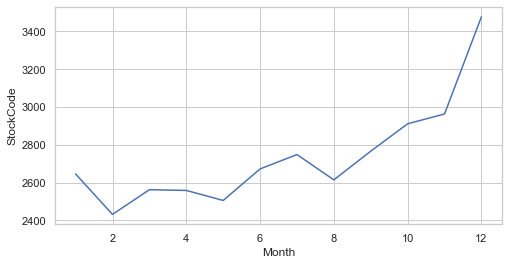

In [73]:
#     д) колл уник заказов(разноообр StockCode ) за месяц


df_ecommerce_all_revenue.groupby('Month').StockCode.nunique()

sns.set(rc={'figure.figsize':(8,4)}, style = "whitegrid")
sns.lineplot(data = df_ecommerce_all_revenue.groupby('Month').StockCode.nunique())


Text(0.5, 0.98, 'Vertically stacked subplots')

<AxesSubplot:xlabel='Month', ylabel='CustomerID'>

Text(0.5, 1.0, 'колл уник покупателей каждый месяц.title')

<AxesSubplot:xlabel='Month', ylabel='InvoiceNo'>

Text(0.5, 1.0, 'колл заказаов каждый месяц.title')

<AxesSubplot:xlabel='Month', ylabel='revenue'>

Text(0.5, 1.0, 'средняя сумма заказа за месяц.title')

<AxesSubplot:ylabel='ratio'>

Text(0.5, 1.0, 'отношение колл заказов в колл уникальных покупателей.title')

<AxesSubplot:xlabel='Month', ylabel='StockCode'>

Text(0.5, 1.0, 'колл уник заказов(разноообр StockCode ) за месяц.title')

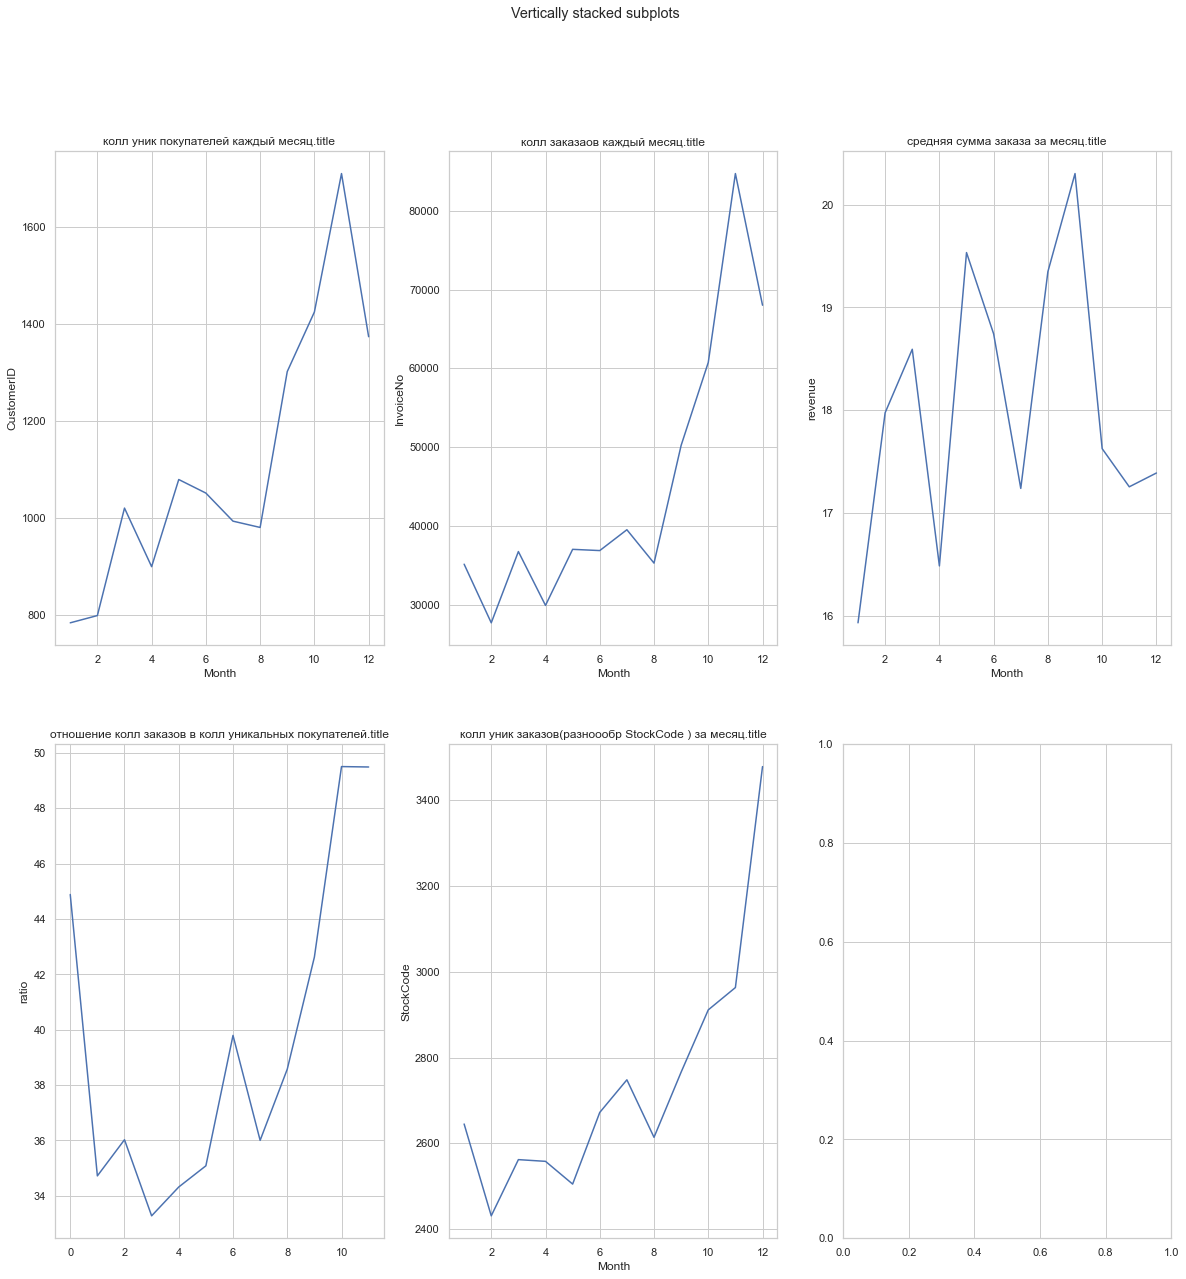

In [74]:
#     е) ВСЕ ЭТО В ДАШБОРД ИЛ ОДИН ГРАФИК

sns.set(rc={'figure.figsize':(20,20)}, style = "whitegrid")


fig, axes = plt.subplots(2,3)
fig.suptitle('Vertically stacked subplots')


# а) колл уник покупателей каждый месяц
sns.lineplot(ax=axes[0, 0], data =numb_of_uniq_users,  x = 'Month', y = 'CustomerID')
axes[0, 0].set_title('колл уник покупателей каждый месяц.title')

# б) колл заказаов кажд месяц
sns.lineplot(ax=axes[0, 1], data =numb_of_orders,  x = 'Month', y = 'InvoiceNo')
axes[0, 1].set_title('колл заказаов каждый месяц.title')

#     в) средняя сумма заказа за месяц
sns.lineplot( ax=axes[0, 2], data =mean_amount_orders,  x = 'Month', y = 'revenue')
axes[0, 2].set_title('средняя сумма заказа за месяц.title')


#     г)   ср колличество  заказов  юзеров к ср колл уник покупателей за месяц
sns.lineplot(ax=axes[1, 0], data =ratio_orders_to_customers,  x = ratio_orders_to_customers.index , y = ratio_orders_to_customers.ratio)
axes[1, 0].set_title('отношение колл заказов в колл уникальных покупателей.title')


#     д) колл уник заказов(разноообр StockCode ) за месяц
sns.lineplot(ax=axes[1, 1], data = df_ecommerce_all_revenue.groupby('Month').StockCode.nunique())
axes[1, 1].set_title('колл уник заказов(разноообр StockCode ) за месяц.title')

